# Lasso Regression on Price Data

This script implements Lasso Regression to analyze a synthetic dataset of prices based on normalized coordinates. It loads the data, normalizes the features, defines a hypothesis function, computes the Lasso cost function with L1 regularization, and uses gradient descent to optimize the model parameters. Finally, it visualizes the data points and the fitted Lasso regression line.


Lasso Regression Optimal parameters: θ_0 = 74.47755198539215, θ_1 = 14.769275231853337
Final Lasso cost: 10.334063420130745


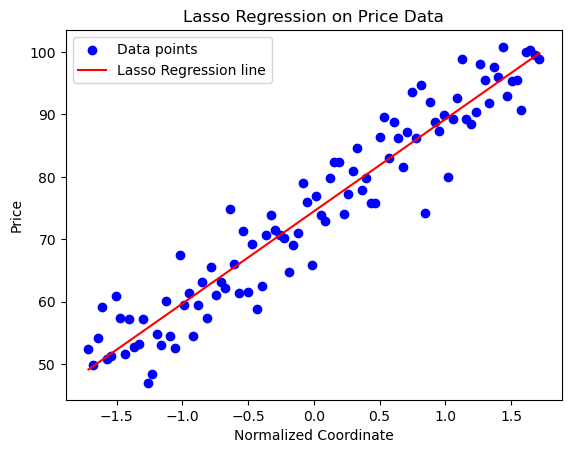

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('synthetic_price_data.csv')
X = data['Coordinate'].values
y = data['Price'].values

# Normalize function
X = (X - np.mean(X)) / np.std(X)

# Hypothesis function
def hypothesis(X, theta):
    return theta[0] + theta[1] * X

# Lasso cost function with L1 regularization
def compute_cost_lasso(X, y, theta, lambda_):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2) + (lambda_ / m) * np.sum(np.abs(theta[1:]))
    return cost

# Gradient descent for Lasso regression
def gradient_descent_lasso(X, y, theta, alpha, num_iterations, lambda_):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - y
        gradients = (1 / m) * np.array([np.sum(errors), np.sum(errors * X)])
        gradients[1] += (lambda_ / m) * np.sign(theta[1])  # L1 regularization term for theta_1
        theta = theta - alpha * gradients
        cost_history[i] = compute_cost_lasso(X, y, theta, lambda_)
    
    return theta, cost_history

# Initializing parameters
alpha = 0.01  # Learning rate
num_iterations = 1000
initial_theta = np.zeros(2)  # Initial parameters [theta_0, theta_1]
lambda_ = 1  # Regularization parameter

# Calling gradient descent function
optimal_theta, cost_history = gradient_descent_lasso(X, y, initial_theta, alpha, num_iterations, lambda_)

# Printing the results
print(f"Lasso Regression Optimal parameters: θ_0 = {optimal_theta[0]}, θ_1 = {optimal_theta[1]}")
print(f"Final Lasso cost: {cost_history[-1]}")

# Plotting the dataset and the Lasso regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, hypothesis(X, optimal_theta), color='red', label='Lasso Regression line')
plt.xlabel('Normalized Coordinate')
plt.ylabel('Price')
plt.title('Lasso Regression on Price Data')
plt.legend()
plt.show()
